In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.metrics import recall_score

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

/Users/asmikumar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Only white, black, hispanic, asian, other

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 245212,
 'Hispanic': 27446,
 'Black': 22939,
 'Other': 10928,
 'Asian': 8068,
 'American Indian/Alaskan Native': 5202}

In [3]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

In [5]:
exclude = ['American Indian/Alaskan Native']

for i in exclude:
    mask = df['Race'] == i
    df = df[~mask]
    
df['Race'].value_counts()

White       245212
Hispanic     27446
Black        22939
Other        10928
Asian         8068
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

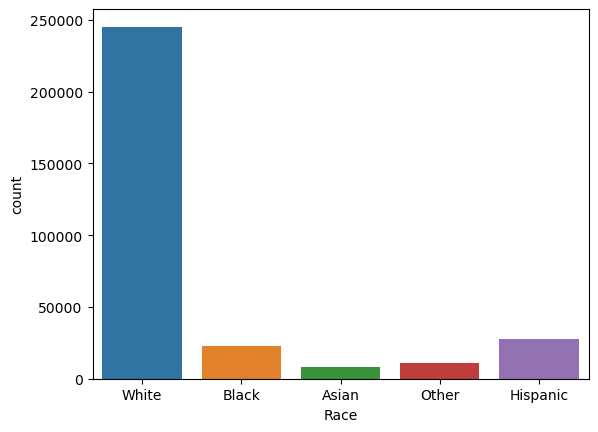

In [6]:
sns.countplot(x = df["Race"])

## Remove duplicates

In [7]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (314593, 18)
Duplicates in dataset: 18068


In [8]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (296525, 18)
Duplicates in dataset: 0


In [9]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 227724,
 'Hispanic': 27107,
 'Black': 22810,
 'Other': 10891,
 'Asian': 7993}

In [11]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.23202428125790406


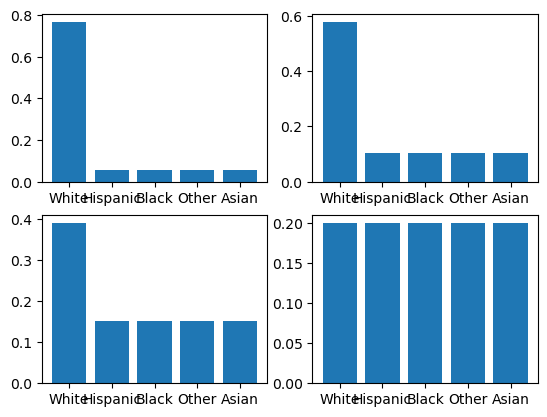

In [12]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,2,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,2,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,2,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,2,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,2,0,1,4,8.0,0,0,0


## Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,4,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,4,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,4,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,4,0,1,4,8.0,0,0,0


## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

continuous_vars=df.select_dtypes('float64').columns
cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.830518,1,0,0,-0.067872,3.193682,0,0,7,4,2,1,4,-1.426628,1,0,1
1,0,-1.251373,0,0,1,-0.437546,-0.506319,0,0,12,4,0,1,4,-0.058196,0,0,0
2,0,-0.285098,1,0,0,2.026949,3.193682,0,1,9,4,2,1,1,0.626020,1,0,0
3,0,-0.652097,0,0,0,-0.437546,-0.506319,0,0,11,4,0,0,2,-0.742412,0,0,1
4,0,-0.729523,0,0,0,3.012747,-0.506319,1,0,4,4,0,1,4,0.626020,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.156571,1,0,0,0.425027,-0.506319,1,1,8,2,2,0,1,-0.742412,1,0,0
319791,0,0.219718,1,0,0,-0.437546,-0.506319,0,1,3,2,0,1,4,-1.426628,1,0,0
319792,0,-0.647451,0,0,0,-0.437546,-0.506319,0,0,5,2,0,1,2,-0.742412,0,0,0
319793,0,0.679628,0,0,0,-0.437546,-0.506319,0,0,1,2,0,0,2,3.362883,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [18]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-0.710940,1,0,0,-0.437546,-0.506319,0,0,9,0,0,1,4,-0.058196,0,0,0
1,1,2.243629,0,0,0,1.410825,-0.506319,1,0,9,1,2,0,3,-0.742412,0,1,0
2,0,0.383861,1,0,0,-0.437546,-0.506319,0,1,9,4,0,1,4,-0.742412,0,0,0
3,0,0.216621,0,0,0,-0.437546,-0.506319,0,1,11,4,0,1,0,0.626020,0,0,1
4,0,-0.447693,0,0,0,0.055353,-0.506319,0,0,10,4,0,1,4,0.626020,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237215,0,2.319507,0,0,0,-0.191097,-0.506319,0,1,2,4,2,1,2,1.310235,0,0,0
237216,0,0.171714,0,0,0,3.259196,1.220348,1,0,8,4,0,0,1,-0.058196,0,0,0
237217,0,-0.082243,0,0,0,-0.437546,-0.506319,1,1,8,4,0,1,4,-0.058196,0,0,0
237218,0,-1.132137,1,0,0,-0.437546,0.110348,0,0,9,1,0,1,0,0.626020,0,0,0


In [19]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-0.901408,0,0,0,-0.437546,-0.506319,0,1,7,0,0,1,0,0.626020,0,0,0
1,0,-0.162765,1,0,0,-0.437546,-0.506319,0,1,2,4,0,1,0,-0.742412,0,0,0
2,0,-0.162765,0,0,0,-0.191097,1.960349,0,1,2,4,0,1,0,-0.742412,0,0,0
3,0,1.430658,1,0,0,-0.437546,-0.506319,1,1,12,4,0,0,4,1.310235,0,0,0
4,0,-0.748105,0,0,0,-0.437546,-0.506319,0,0,12,4,0,1,2,-0.742412,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59300,0,-0.735717,1,0,0,3.259196,-0.506319,0,1,6,4,0,1,1,-1.426628,0,0,0
59301,1,-0.402786,0,0,1,-0.437546,1.343682,0,0,9,4,0,1,2,0.626020,0,1,0
59302,0,0.348245,1,0,0,0.178578,0.357015,1,0,10,4,0,1,4,0.626020,0,0,0
59303,0,0.639366,0,0,0,3.259196,-0.506319,0,1,4,4,2,1,1,0.626020,0,0,0


In [32]:
counts = training_data['Race'].value_counts()
counts = dict(counts)
counts # prints {4: 182226, 2: 21749, 1: 18218, 3: 8642, 0: 6385}
# counts = {k: v for k, v in sorted(counts.items(), key=lambda item: -item[1])}
# counts
# total = 241103

counts = {4: 182226, 3: 21749, 2: 18218, 0: 6385, 1: 8642}
counts

{4: 182226, 3: 21749, 2: 18218, 0: 6385, 1: 8642}

In [33]:
race = {4: "White", 3: "Hispanic", 2: "Black", 1: "Asian", 0: "Other"}

## Random oversampling

In [34]:
orig_white = counts[4]/sum(training_data['Race'].value_counts())
print("Orignal % white:", orig_white)

orig_propors = {}

for i in race.keys():
    orig_propors[i] = counts[i]/sum(training_data['Race'].value_counts())
                            
orig_propors

Orignal % white: 0.7681730039625664


{4: 0.7681730039625664,
 3: 0.09168282606862828,
 2: 0.0767979091139027,
 1: 0.036430317848410755,
 0: 0.026915943006491864}

### Stage 1

In [35]:
propor_1 = (1-orig_white)/4
race_proportions_1 = {4: orig_white, 3: propor_1, 2: propor_1, 1: propor_1, 0: propor_1}
race_proportions_1

{4: 0.7681730039625664,
 3: 0.057956749009358405,
 2: 0.057956749009358405,
 1: 0.057956749009358405,
 0: 0.057956749009358405}

In [46]:
# Separate class
class_4 = training_data[training_data['Race'] == 4]
class_3 = training_data[training_data['Race'] == 3]
class_2 = training_data[training_data['Race'] == 2]
class_1 = training_data[training_data['Race'] == 1]
class_0 = training_data[training_data['Race'] == 0]

class_2_over = class_2.sample(counts[3], replace=True)
class_1_over = class_1.sample(counts[3], replace=True)
class_0_over = class_0.sample(counts[3], replace=True)

In [47]:
class_4_over_count = race_proportions_1[4]/race_proportions_1[3] * counts[3]
print(class_4_over_count)
class_4_over = class_4.sample(int(class_4_over_count), replace=True)
# class_5 = training_data[training_data['Race'] == 5]

288266.59446485067


In [48]:
training_data_1 = pd.concat([class_4_over, class_3, class_2_over, class_1_over, class_0_over], axis=0)
training_data_1['Race'].value_counts()

4    288266
2     21749
1     21749
0     21749
3      8642
Name: Race, dtype: int64

### Stage 2

In [77]:
propor_2 = 1/3
race_proportions_2 = {2: propor_2, 1: propor_2, 0: propor_2}
race_proportions_2

{2: 0.3333333333333333, 1: 0.3333333333333333, 0: 0.3333333333333333}

In [78]:
# Separate class
class_1_over = class_1.sample(counts[2], replace=True)
class_0_over = class_0.sample(counts[2], replace=True)

In [79]:
training_data_2 = pd.concat([class_2, class_1_over, class_0_over], axis=0)
training_data_2['Race'].value_counts()

2    182087
1    182087
0    182087
Name: Race, dtype: int64

### Stage 3, Stage 4

In [80]:
race_proportions_3 = {}
race_proportions_4 = {}

for i in race_proportions_1.keys():
    race_proportions_3[i] = (race_proportions_1[i]*2 + race_proportions_2[i]) / 3
    race_proportions_4[i] = (race_proportions_1[i] + race_proportions_2[i]*2) / 3

In [81]:
# Separate class
class_0_over = class_0.sample(counts[1], replace=True)

In [82]:
class_2_over_count = race_proportions_3[2]/race_proportions_3[1] * counts[1]
print(class_2_over_count)
class_2_over = class_2.sample(int(class_2_over_count), replace=True)
# class_5 = training_data[training_data['Race'] == 5]

83026.40186213971


In [83]:
training_data_3 = pd.concat([class_2_over, class_1, class_0_over], axis=0)
training_data_3['Race'].value_counts()

2    83026
1    21611
0    21611
Name: Race, dtype: int64

In [84]:
class_2_over_count = race_proportions_4[2]/race_proportions_4[1] * counts[1]
print(class_2_over_count)
class_2_over = class_2.sample(int(class_2_over_count), replace=True)
# class_5 = training_data[training_data['Race'] == 5]

42448.950266875414


In [85]:
training_data_4 = pd.concat([class_2_over, class_1, class_0_over], axis=0)
training_data_4['Race'].value_counts()

2    42448
1    21611
0    21611
Name: Race, dtype: int64

### Plotting

In [86]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']

X_train = training_data.drop(['HeartDisease'], axis=1)
y_train = training_data['HeartDisease']

X_train_1 = training_data_1.drop(['HeartDisease'], axis=1)
y_train_1 = training_data_1['HeartDisease']

X_train_2 = training_data_2.drop(['HeartDisease'], axis=1)
y_train_2 = training_data_2['HeartDisease']

X_train_3 = training_data_3.drop(['HeartDisease'], axis=1)
y_train_3 = training_data_3['HeartDisease']

X_train_4 = training_data_4.drop(['HeartDisease'], axis=1)
y_train_4 = training_data_4['HeartDisease']

X_train_list = [X_train, X_train_1, X_train_2, X_train_3, X_train_4]
y_train_list = [y_train, y_train_1, y_train_2, y_train_3, y_train_4]

data_desc = ['Imbalanced', 'Random Over-sampling Stage 1', 'Random Over-sampling Stage 2', 'Random Over-sampling Stage 3', 'Random Over-sampling Stage 4']

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

222112 training examples


/Users/asmikumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     50480
           1       0.33      0.11      0.17      5049

    accuracy                           0.90     55529
   macro avg       0.63      0.54      0.56     55529
weighted avg       0.86      0.90      0.88     55529



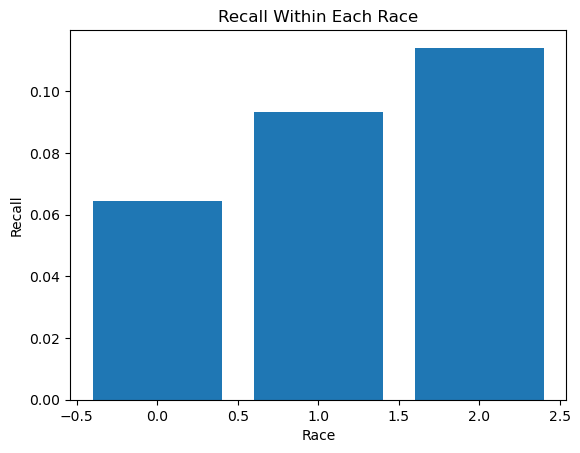

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM OVER-SAMPLING STAGE 1):

239853 training examples


/Users/asmikumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     50480
           1       0.27      0.17      0.21      5049

    accuracy                           0.88     55529
   macro avg       0.60      0.56      0.57     55529
weighted avg       0.86      0.88      0.87     55529



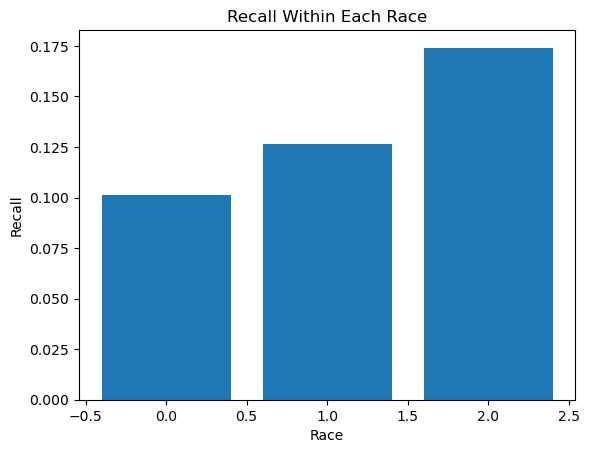

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING STAGE 2):

546261 training examples


/Users/asmikumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     50480
           1       0.29      0.12      0.17      5049

    accuracy                           0.89     55529
   macro avg       0.61      0.55      0.56     55529
weighted avg       0.86      0.89      0.87     55529



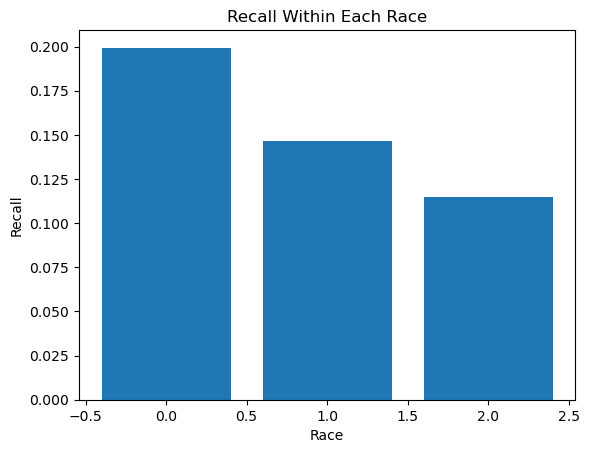

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (RANDOM OVER-SAMPLING STAGE 3):

126248 training examples


/Users/asmikumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     50480
           1       0.28      0.13      0.17      5049

    accuracy                           0.89     55529
   macro avg       0.60      0.55      0.56     55529
weighted avg       0.86      0.89      0.87     55529



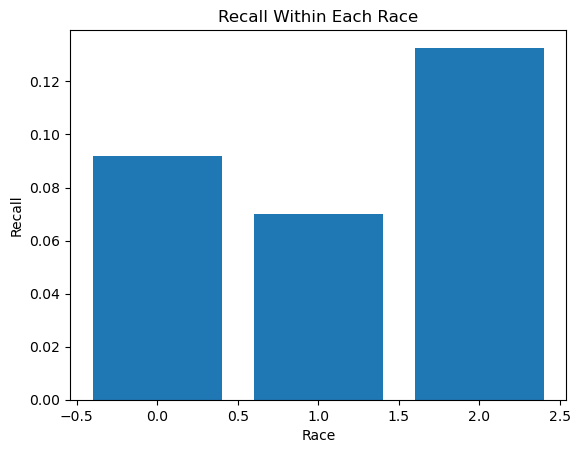

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (RANDOM OVER-SAMPLING STAGE 4):

85670 training examples


/Users/asmikumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.94     50480
           1       0.29      0.10      0.15      5049

    accuracy                           0.90     55529
   macro avg       0.60      0.54      0.55     55529
weighted avg       0.86      0.90      0.87     55529



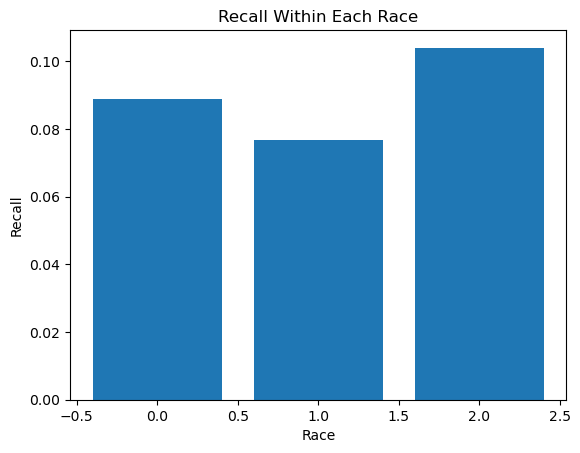

---------------------------------------------------------------------------


In [90]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train_list[i], y_train_list[i])
    pred = clf_knn.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Recall')
    plt.title('Recall Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")